# Exercise: Using naive_bayes models

In [1]:
import numpy as np
import pandas as pd

### Read Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/playgolf_data.csv")
df.head()

,Day,Outlook,Temperature,Humidity,Wind,Play Golf
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes


### Feature and Target Preparation

In [3]:
X=df.iloc[:, 1:5]
y=df[["Play Golf"]]
y=y.rename(columns={"Play Golf":"Target"})

In [4]:
# Convert X and y to dummies 
X_now=pd.get_dummies(X).astype(int)
y_now=pd.get_dummies(y, drop_first=True).astype(int)

## Building a naive model 

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(X_now,y_now)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BernoulliNB()

In [42]:
y_pred=model.predict(X_now)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_now, y_pred)

0.9285714285714286

In [44]:
# Get classification report 
from sklearn.metrics import classification_report
print(classification_report(y_now, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



### Visualizing the result

In [45]:
# Get predicted probability
y_prob=model.predict_proba(X_now)
# Get predicted probability for class 1
score=y_prob[:,1]
#Get false and true positive rate and threshold
from sklearn.metrics import roc_curve

fpr,tpr,threshold=roc_curve(y_now, score)

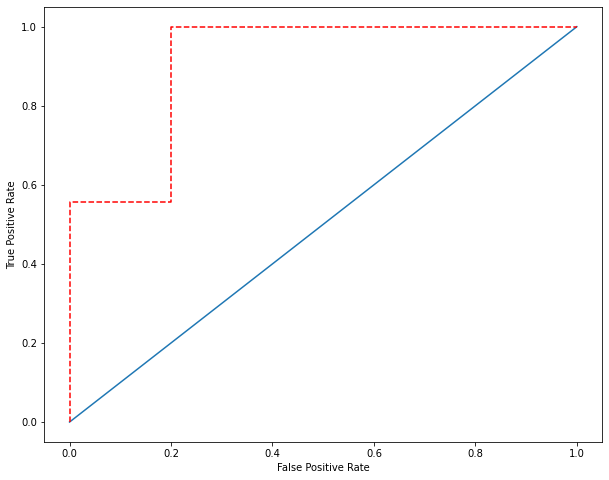

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1])
plt.plot(fpr, tpr, color="r", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Label encoder

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d

In [34]:
labelEncoder=LabelEncoder()
target=labelEncoder.fit_transform(column_or_1d(y))

In [35]:
target

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])